In [ ]:
#Problem statement of this case study :- 


In [211]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
#Reading the data from csv file to dataframe
loan_data = pd.read_csv("loan.csv", low_memory=False)
#Check for unnecessary header and footer rows to delete
loan_data.head()
loan_data.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
39712,92187,92174,2500,2500,1075.0,36 months,8.07%,78.42,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39713,90665,90607,8500,8500,875.0,36 months,10.28%,275.38,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39714,90395,90390,5000,5000,1325.0,36 months,8.07%,156.84,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39715,90376,89243,5000,5000,650.0,36 months,7.43%,155.38,A,A2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39716,87023,86999,7500,7500,800.0,36 months,13.75%,255.43,E,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [182]:
print(loan_data.shape)
#Remove missing value columns if any
loan_data.dropna(axis = 1, how = 'all', inplace = True)
print(loan_data.shape)

(39717, 111)
(39717, 57)


<AxesSubplot:>

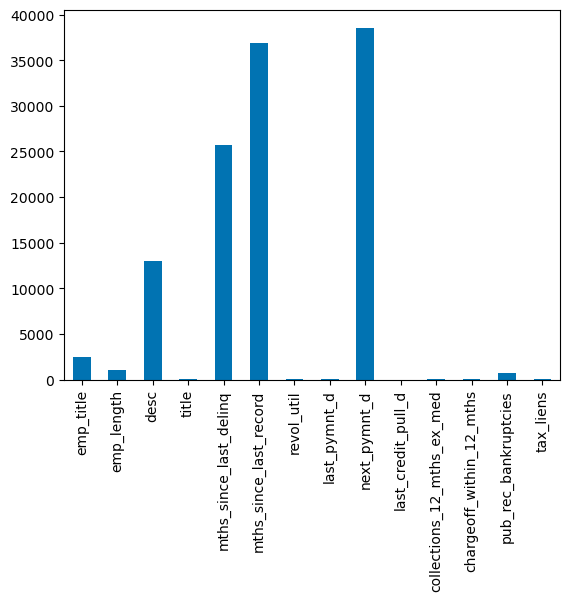

In [183]:
#plot to understand missing values in each column of the dataset
loan_data.isna().sum()[loan_data.isna().sum()>0].plot(kind='bar')

In [185]:
#From above plot we can see that some cloumns have missing values, drop columns where null values are more than 10000
loan_data.drop(loan_data.columns[loan_data.apply(lambda col: col.isna().sum() > 10000)], axis=1, inplace=True)
print(loan_data.shape)
#Remove missing value rows from columns having null vlaues < 10000
loan_data.dropna(subset=['pub_rec_bankruptcies'], inplace=True)
loan_data.dropna(subset=['emp_title'], inplace=True)
loan_data.dropna(subset=['emp_length'], inplace=True)
print(loan_data.shape)

(36548, 53)
(36548, 53)


In [186]:
#Drop columns with only one value for all rows . We can't do any analysis on these columns.
loan_data.drop(loan_data.columns[loan_data.apply(lambda col: col.nunique() == 1)], axis=1, inplace=True)
print(loan_data.shape)

(36548, 44)


In [187]:
#Let us understand the loan_data
print(loan_data.dtypes)

id                           int64
member_id                    int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                        object
int_rate                    object
installment                float64
grade                       object
sub_grade                   object
emp_title                   object
emp_length                  object
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
url                         object
purpose                     object
title                       object
zip_code                    object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal           

In [188]:
loan_data.shape

(36548, 44)

# Now we have 44 columns out of which some correspond to the post approval of loan
We will see the user details and the driving factors of loan defaulting before approving loan.
So we can safely omit the columns / variables respect to that case.
Also there are some columns such as "id", "member_id", "url", "title", "emp_title", "zip_code", "last_credit_pull_d", "addr_state".
The above features or columns doesnt contribute to the loan defaulting in any way due to irrelevant information. So removing them.
"desc" has description (text data) which we cannot do anythhing about for now. So removing the column.
"out_prncp_inv" , "total_pymnt_inv " are useful for investors but not contributing to the loan defaulting analysis. So removing them.
"funded_amnt" is not needed because we only need info as to how much is funded in actual. As we have "funded_amnt_inv" , we can remove the earlier column.

List of post-approval features:- 
delinq_2yrs
revol_bal
out_prncp
total_pymnt
total_rec_prncp
total_rec_int
total_rec_late_fee
recoveries
collection_recovery_fee
last_pymnt_d
last_pymnt_amnt
next_pymnt_d
chargeoff_within_12_mths
mths_since_last_delinq
mths_since_last_record

In [189]:
#lETS HAVE A LOOK ON TOTAL COLUMNS LEFT FOR US 
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [190]:
#We need to understand the features that which kind of people default , we will remove the one where status is current later on .. will see
#The goal of the analysis is to see who is likely to default and this can only be said in case of either fully paid or charged off loans.
loan_data = loan_data[loan_data.loan_status != "Current"]
loan_data.loan_status.unique()

array(['Charged Off', 'Fully Paid'], dtype=object)

In [ ]:
#Checking for missing values

In [191]:
(loan_data.isna().sum()/len(loan_data.index))*100

id                         0.000000
member_id                  0.000000
loan_amnt                  0.000000
funded_amnt                0.000000
funded_amnt_inv            0.000000
term                       0.000000
int_rate                   0.000000
installment                0.000000
grade                      0.000000
sub_grade                  0.000000
emp_title                  0.000000
emp_length                 0.000000
home_ownership             0.000000
annual_inc                 0.000000
verification_status        0.000000
issue_d                    0.000000
loan_status                0.000000
url                        0.000000
purpose                    0.000000
title                      0.025365
zip_code                   0.000000
addr_state                 0.000000
dti                        0.000000
delinq_2yrs                0.000000
earliest_cr_line           0.000000
inq_last_6mths             0.000000
open_acc                   0.000000
pub_rec                    0

In [75]:
# Missing values

<AxesSubplot:>

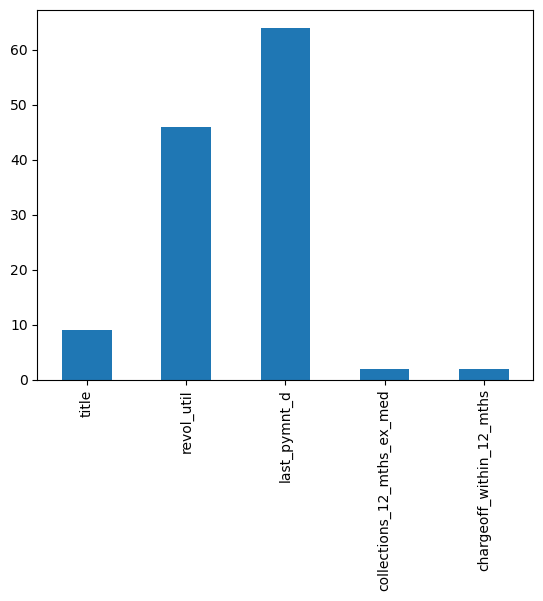

In [13]:
loan_data.isna().sum()[loan_data.isna().sum()>0].plot(kind='bar')

In [77]:
#Handling Missing values
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35482 entries, 1 to 39680
Data columns (total 44 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       35482 non-null  int64  
 1   member_id                35482 non-null  int64  
 2   loan_amnt                35482 non-null  int64  
 3   funded_amnt              35482 non-null  int64  
 4   funded_amnt_inv          35482 non-null  float64
 5   term                     35482 non-null  object 
 6   int_rate                 35482 non-null  object 
 7   installment              35482 non-null  float64
 8   grade                    35482 non-null  object 
 9   sub_grade                35482 non-null  object 
 10  emp_title                35482 non-null  object 
 11  emp_length               35482 non-null  object 
 12  home_ownership           35482 non-null  object 
 13  annual_inc               35482 non-null  float64
 14  verification_status   

In [63]:
print("Mode : " + loan_data.emp_length.mode()[0])
loan_data.emp_length.value_counts()

Mode : 10+ years


10+ years    8038
2 years      4094
< 1 year     3997
3 years      3844
4 years      3221
5 years      3058
1 year       2975
6 years      2067
7 years      1642
8 years      1366
9 years      1180
Name: emp_length, dtype: int64

In [78]:
print("Mode : " + loan_data.emp_length.mode()[0])
loan_data.emp_length.value_counts()

Mode : 10+ years


10+ years    8038
2 years      4094
< 1 year     3997
3 years      3844
4 years      3221
5 years      3058
1 year       2975
6 years      2067
7 years      1642
8 years      1366
9 years      1180
Name: emp_length, dtype: int64

In [79]:
#The above value counts shows that the mode value has far higher frequency than that of the next most frequent value.

-This means that we can safely assign the value of mode to the null values in the column.
-Also the missing values are in very low percentage. So imputung with mode value doesnt affect the analysis much.

In [82]:
loan_data.emp_length.fillna(loan_data.emp_length.mode()[0], inplace = True)
loan_data.emp_length.isna().sum()

0

In [83]:
loan_data.dropna(axis = 0, subset = ['revol_util'] , inplace = True)
loan_data.revol_util.isna().sum()

0

Standardizing the data
-"revol_util" column although described as an object column, it has continous values.
-So we need to standardize the data in this column
-"int_rate" is one such column.
-"emp_length" --> { (< 1 year) is assumed as 0 and 10+ years is assumed as 10 }
-Although the datatype of "term" is arguable to be an integer, there are only two values in the whole column and it might as well be declared a categorical variable.

In [85]:
loan_data.revol_util = pd.to_numeric(loan_data.revol_util.apply(lambda x : x.split('%')[0]))

In [86]:
loan_data.int_rate = pd.to_numeric(loan_data.int_rate.apply(lambda x : x.split('%')[0]))

In [87]:
loan_data.emp_length = pd.to_numeric(loan_data.emp_length.apply(lambda x: 0 if "<" in x else (x.split('+')[0] if "+" in x else x.split()[0])))


In [88]:

loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,...,5632.21,5000.00,632.21,0.00,0.00,0.00,Jan-15,161.03,Jan-16,0.0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96,170.08,C,C5,...,10110.84,6985.61,3125.23,0.00,0.00,0.00,May-16,1313.76,May-16,0.0
7,1072053,1288686,3000,3000,3000.0,36 months,18.64,109.43,E,E1,...,3939.14,3000.00,939.14,0.00,0.00,0.00,Jan-15,111.34,Dec-14,0.0


In [89]:
#Remove Outliers 

<AxesSubplot:xlabel='annual_inc'>

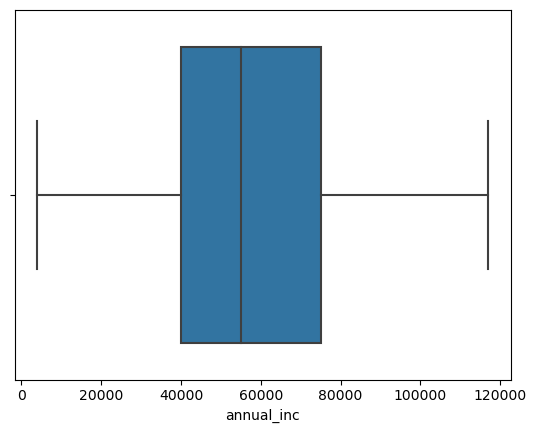

In [117]:
# plot with specifying the x, y parameters
warnings.simplefilter(action="ignore", category=FutureWarning)
sns.boxplot(loan_data['annual_inc'])

In [102]:
quantile_info = loan_data.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.97,0.98, 0.99])
quantile_info

0.50     57000.0
0.75     78000.0
0.90    100000.0
0.95    117000.0
0.97    124000.0
0.98    129000.0
0.99    135000.0
Name: annual_inc, dtype: float64

In [103]:
per_95_annual_inc = loan_data['annual_inc'].quantile(0.95)
loan_data = loan_data[loan_data.annual_inc <= per_95_annual_inc]

<AxesSubplot:xlabel='annual_inc'>

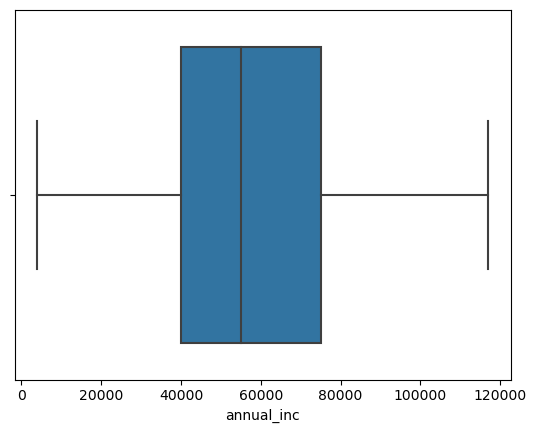

In [118]:
warnings.simplefilter(action="ignore", category=FutureWarning)
sns.boxplot(loan_data.annual_inc)

#Now the "annual_inc" data looks good and proceeding next.analyze other numerical variables which may have outliers.
-dti
-loan_amnt
-funded_amnt_inv

<AxesSubplot:xlabel='dti'>

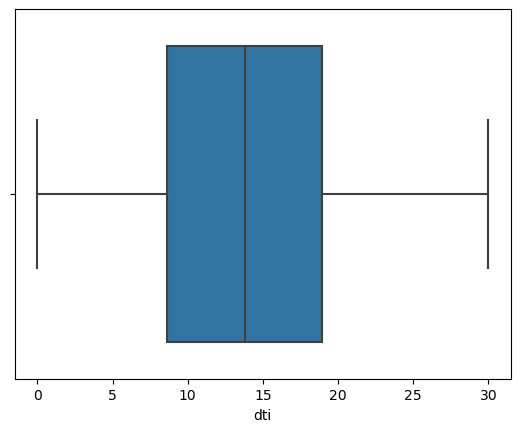

In [119]:
# plot with specifying the x, y parameters
warnings.simplefilter(action="ignore", category=FutureWarning)
sns.boxplot(loan_data.dti)

<AxesSubplot:xlabel='loan_amnt'>

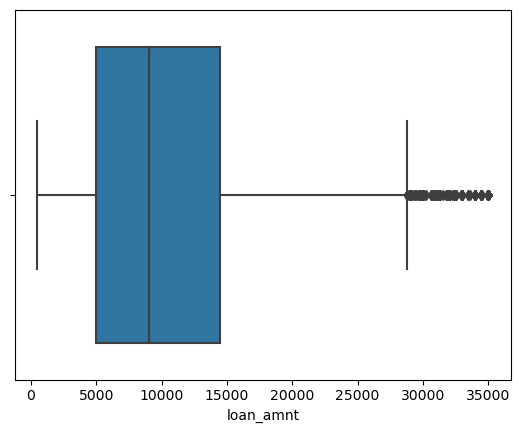

In [120]:
sns.boxplot(loan_data.loan_amnt)

In [121]:

loan_data.loan_amnt.quantile([0.75,0.90,0.95,0.97,0.975, 0.98, 0.99, 1.0])

0.750    14500.0
0.900    20000.0
0.950    25000.0
0.970    25000.0
0.975    26000.0
0.980    28476.0
0.990    34000.0
1.000    35000.0
Name: loan_amnt, dtype: float64

<AxesSubplot:xlabel='funded_amnt_inv'>

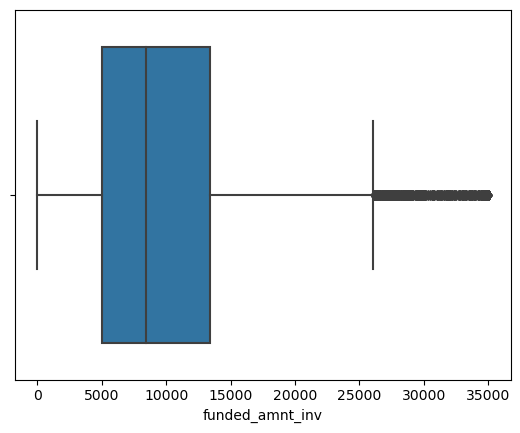

In [122]:

sns.boxplot(loan_data.funded_amnt_inv)

In [123]:

loan_data.funded_amnt_inv.quantile([0.5,0.75,0.90,0.95,0.97,0.975, 0.98,0.985, 0.99, 1.0])

0.500     8400.000000
0.750    13425.000000
0.900    19475.000000
0.950    23452.115000
0.970    24936.505756
0.975    25000.000000
0.980    26375.000000
0.985    28879.388316
0.990    30000.000000
1.000    35000.000000
Name: funded_amnt_inv, dtype: float64

# Though there are some values far from distribution, the distribution is pretty continousand there is no need to remove outliers / extreme values for these above columns.

# As we already have grade column, extracting only subgrade (int level value) from the sub_grade variable

In [124]:
#We are analyzing and visualizing only the defaulter data. So subsetting the data while plotting only for 'Charged Off' loan_status for below plots

<AxesSubplot:xlabel='loan_status', ylabel='count'>

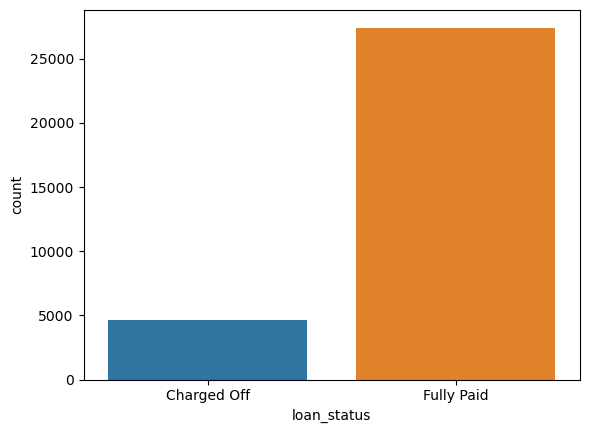

In [125]:
sns.countplot(x = 'loan_status', data = loan_data)

In [126]:
loan_data.sub_grade = pd.to_numeric(loan_data.sub_grade.apply(lambda x : x[-1]))
loan_data.sub_grade.head()

1    4
3    1
5    4
6    5
7    1
Name: sub_grade, dtype: int64

<AxesSubplot:xlabel='grade', ylabel='count'>

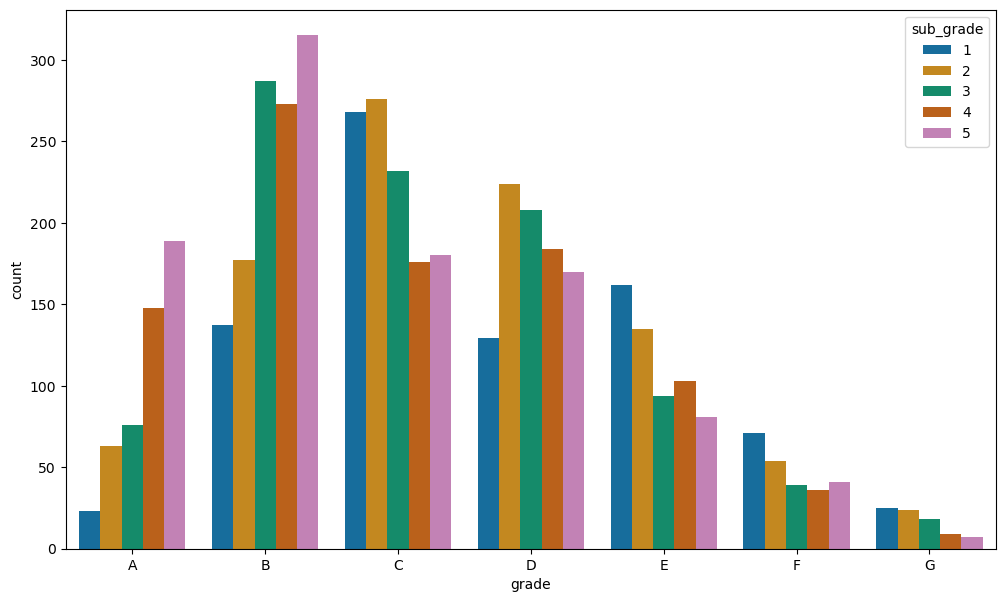

In [127]:
fig, ax = plt.subplots(figsize=(12,7))
sns.set_palette('colorblind')
sns.countplot(x = 'grade', order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] , hue = 'sub_grade',data = loan_data[loan_data.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='grade', ylabel='count'>

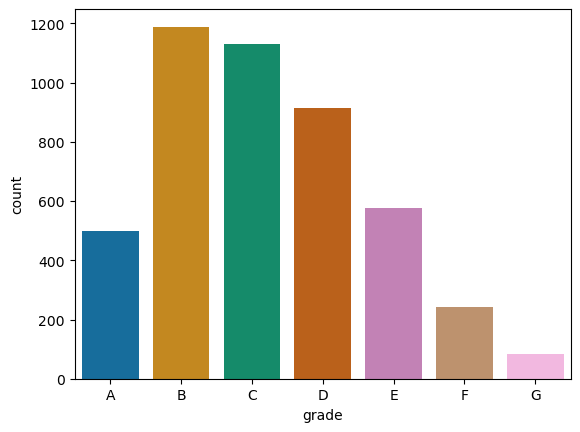

In [128]:
sns.countplot(x = 'grade', data = loan_data[loan_data.loan_status == 'Charged Off'], order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])


In [129]:
#Analyze who has house or rent 

In [130]:
#checking unique values for home_ownership
loan_data['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

In [131]:
#There are only 3 records with 'NONE' value in the data. So replacing the value with 'OTHER'

In [132]:
#replacing 'NONE' with 'OTHERS'
loan_data['home_ownership'].replace(to_replace = ['NONE'],value='OTHER',inplace = True)

In [133]:
#checking unique values for home_ownership again
loan_data['home_ownership'].unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER'], dtype=object)

<AxesSubplot:xlabel='home_ownership', ylabel='count'>

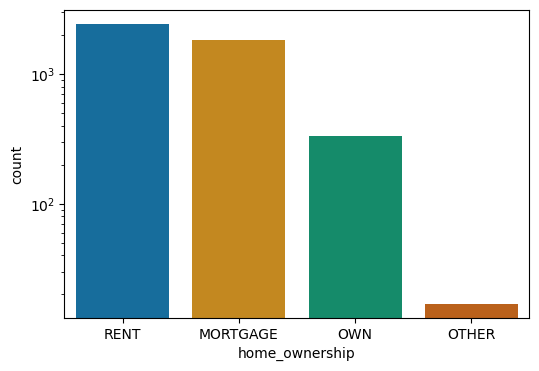

In [134]:
fig, ax = plt.subplots(figsize = (6,4))
ax.set(yscale = 'log')
sns.countplot(x='home_ownership', data=loan_data[loan_data['loan_status']=='Charged Off'])

In [135]:
#Analyzing reason why they took loan whether they want to buy something or not (Rationale or purpose)

<AxesSubplot:xlabel='count', ylabel='purpose'>

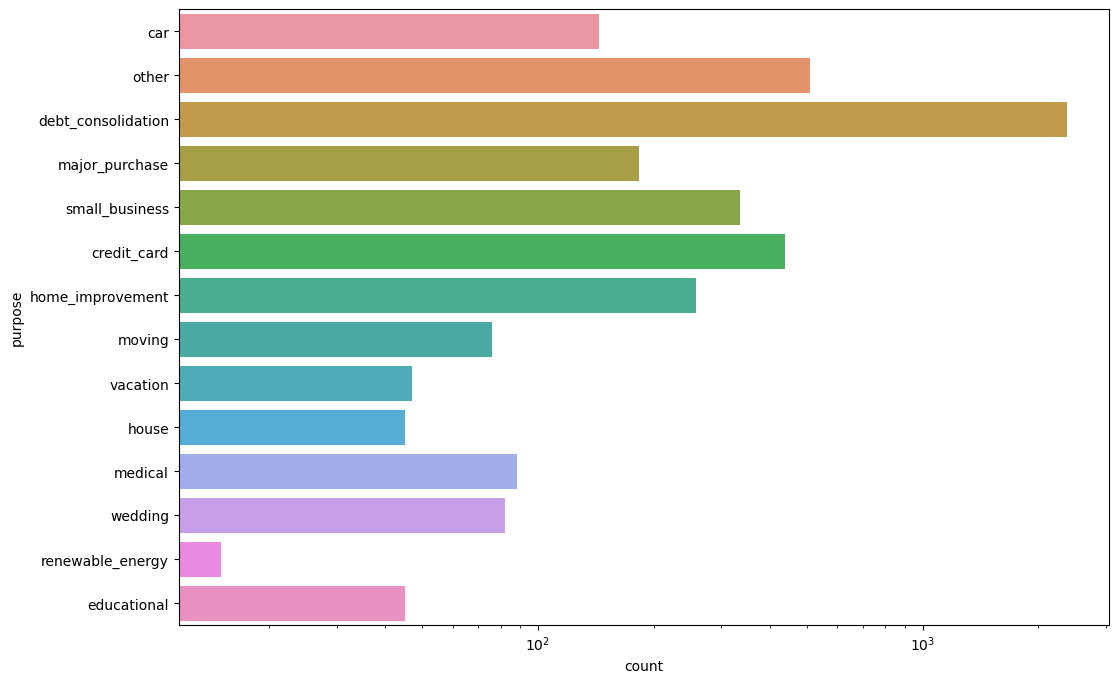

In [136]:
fig, ax = plt.subplots(figsize = (12,8))
ax.set(xscale = 'log')
sns.countplot(y ='purpose', data=loan_data[loan_data.loan_status == 'Charged Off'])

In [137]:
#Creating bins for some numerical variable to make them categorical

In [139]:
loan_data['int_rate_groups'] = pd.cut(loan_data['int_rate'], bins=5,precision =0,labels=['5%-9%','9%-13%','13%-17%','17%-21%','21%-24%'])
loan_data['open_acc_groups'] = pd.cut(loan_data['open_acc'],bins = 5,precision =0,labels=['2-10','10-19','19-27','27-36','36-44'])
loan_data['revol_util_groups'] = pd.cut(loan_data['revol_util'], bins=5,precision =0,labels=['0-20','20-40','40-60','60-80','80-100'])
loan_data['total_acc_groups'] = pd.cut(loan_data['total_acc'], bins=5,precision =0,labels=['2-20','20-37','37-55','55-74','74-90'])
loan_data['annual_inc_groups'] = pd.cut(loan_data['annual_inc'], bins=5,precision =0,labels =['3k-31k','31k-58k','58k-85k','85k-112k','112k-140k'])

In [140]:
# Viewing new bins created
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,int_rate_groups,open_acc_groups,revol_util_groups,total_acc_groups,annual_inc_groups
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,4,...,1.11,Apr-13,119.66,Sep-13,0.0,13%-17%,2-10,0-20,2-20,31k-58k
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,1,...,0.00,Jan-15,357.48,Apr-16,0.0,13%-17%,10-19,20-40,37-55,31k-58k
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,4,...,0.00,Jan-15,161.03,Jan-16,0.0,5%-9%,2-10,20-40,2-20,31k-58k
6,1069639,1304742,7000,7000,7000.0,60 months,15.96,170.08,C,5,...,0.00,May-16,1313.76,May-16,0.0,13%-17%,2-10,80-100,2-20,31k-58k
7,1072053,1288686,3000,3000,3000.0,36 months,18.64,109.43,E,1,...,0.00,Jan-15,111.34,Dec-14,0.0,17%-21%,2-10,80-100,2-20,31k-58k


In [141]:
#Analyzing interest rate wrt the interest rate bins created

<AxesSubplot:xlabel='emp_length', ylabel='count'>

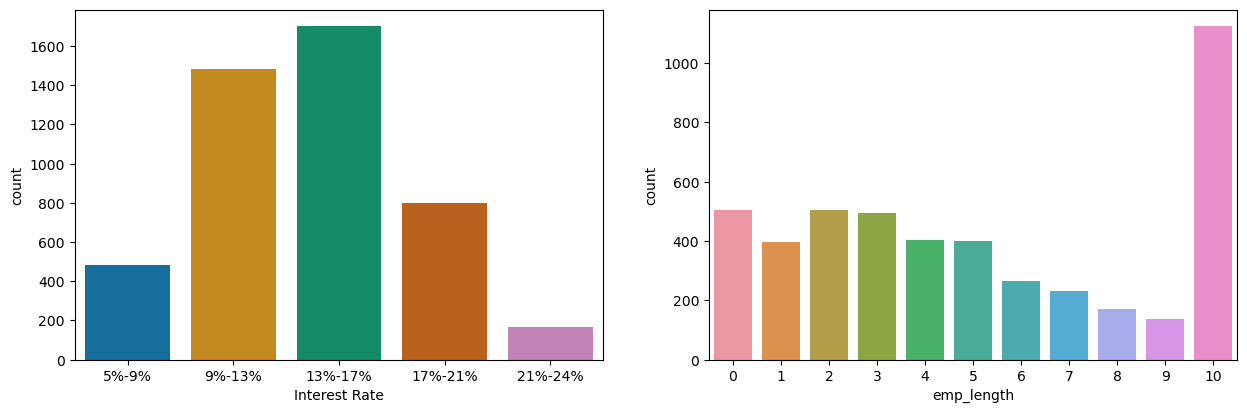

In [142]:
fig, ax = plt.subplots(figsize = (15,10))
plt.subplot(221)
sns.countplot(x='int_rate_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])
plt.xlabel('Interest Rate')
plt.subplot(222)
sns.countplot(x='emp_length', data=loan_data[loan_data.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='open_acc_groups', ylabel='count'>

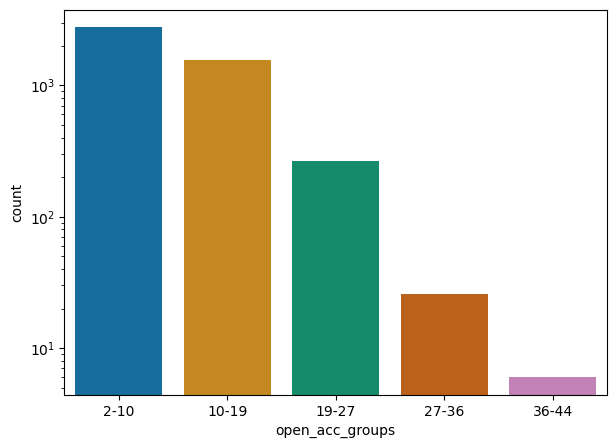

In [143]:
#Similarly analyzing open_acc,revol_util,total_acc,annual_inc
fig, ax = plt.subplots(figsize = (7,5))
ax.set_yscale('log')
sns.countplot(x='open_acc_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='revol_util_groups', ylabel='count'>

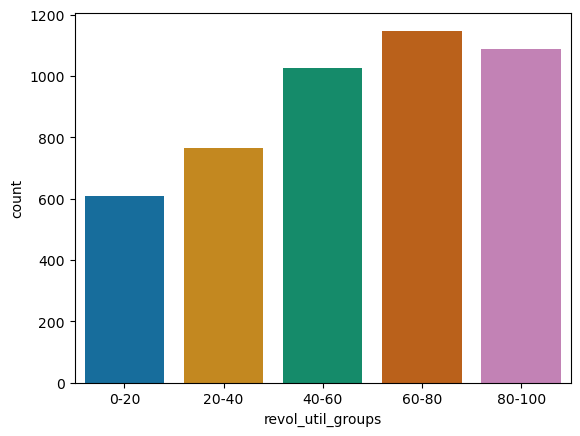

In [144]:
sns.countplot(x='revol_util_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='total_acc_groups', ylabel='count'>

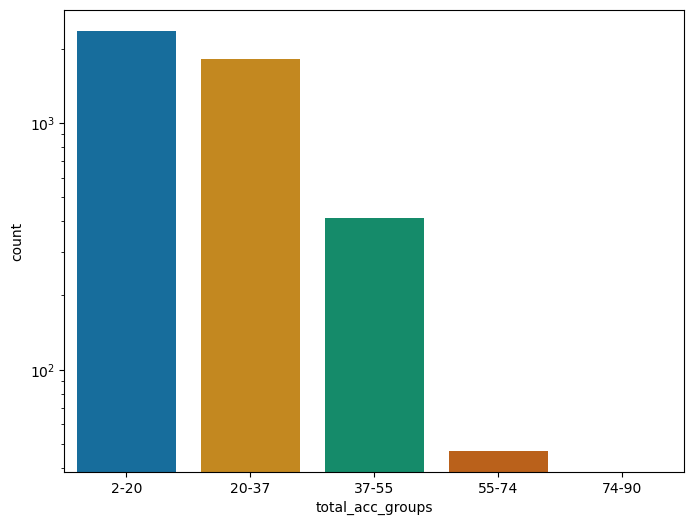

In [145]:
fig, ax = plt.subplots(figsize = (8,6))
ax.set_yscale('log')
sns.countplot(x='total_acc_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='annual_inc_groups', ylabel='count'>

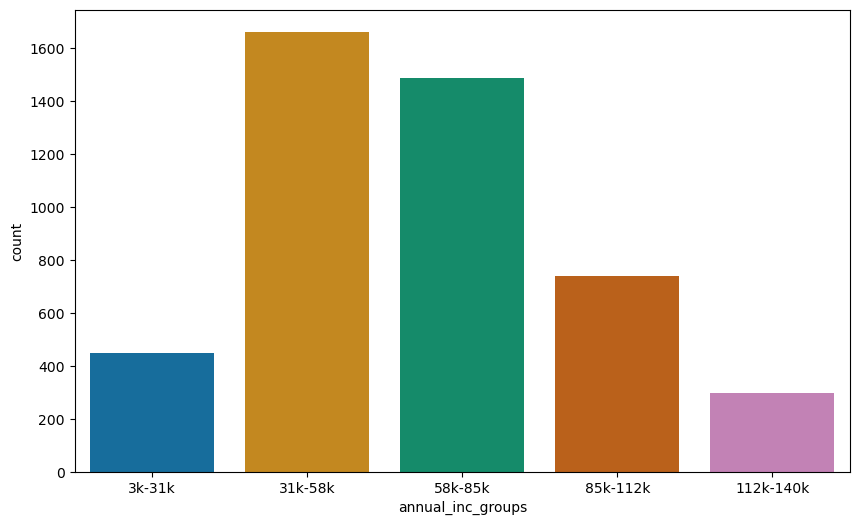

In [146]:
fig, ax = plt.subplots(figsize = (10,6))
sns.countplot(x='annual_inc_groups', data=loan_data[loan_data.loan_status == 'Charged Off'])

<AxesSubplot:xlabel='count', ylabel='term'>

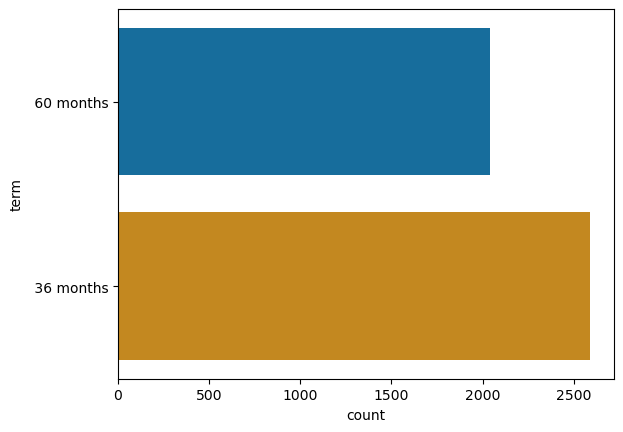

In [147]:

sns.countplot(y='term', data=loan_data[loan_data['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='verification_status', ylabel='count'>

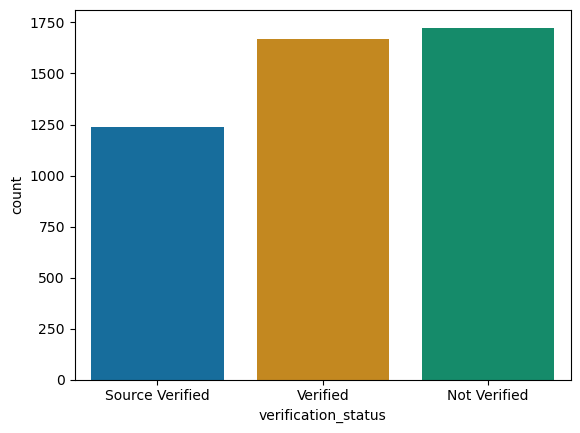

In [148]:
sns.countplot(x='verification_status', data=loan_data[loan_data['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='inq_last_6mths', ylabel='count'>

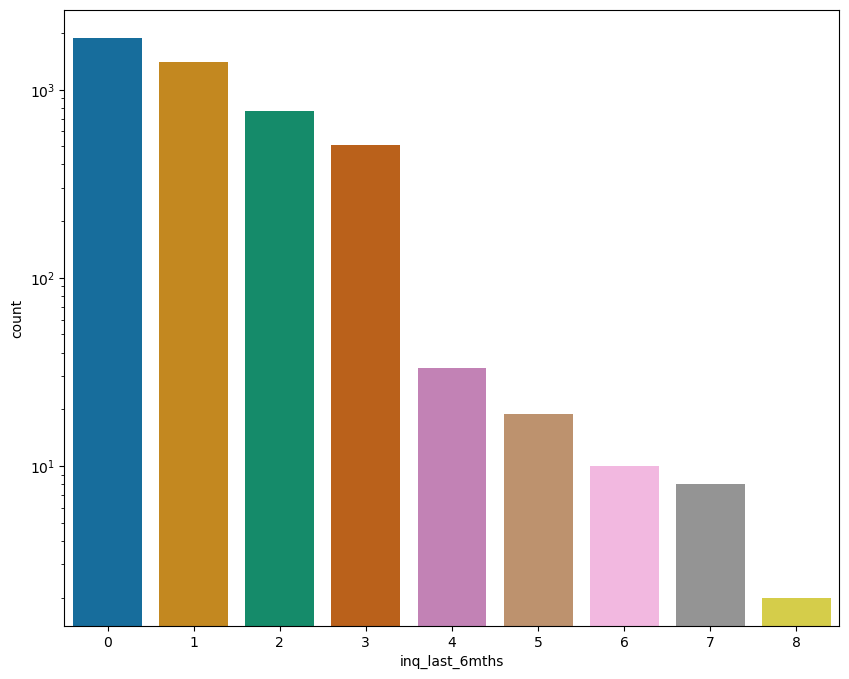

In [149]:
fig,ax = plt.subplots(figsize = (10,8))
ax.set_yscale('log')
sns.countplot(x='inq_last_6mths', data=loan_data[loan_data['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='pub_rec', ylabel='count'>

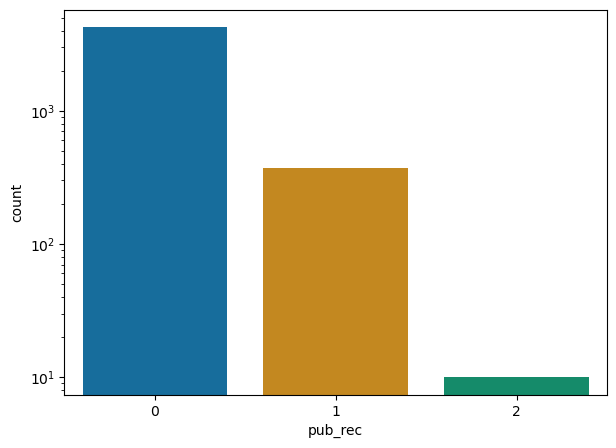

In [150]:

fig,ax = plt.subplots(figsize = (7,5))
ax.set_yscale('log')
sns.countplot(x='pub_rec', data=loan_data[loan_data['loan_status']=='Charged Off'])

In [151]:
#We will now determine by checking or analyzing issued month & Year 

In [152]:
## Extracting month and year
df_month_year = loan_data['issue_d'].str.partition("-", True)     
loan_data['issue_month']=df_month_year[0]                       
loan_data['issue_year']='20' + df_month_year[2]

In [153]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,int_rate_groups,open_acc_groups,revol_util_groups,total_acc_groups,annual_inc_groups,issue_month,issue_year
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,4,...,119.66,Sep-13,0.0,13%-17%,2-10,0-20,2-20,31k-58k,Dec,2011
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,1,...,357.48,Apr-16,0.0,13%-17%,10-19,20-40,37-55,31k-58k,Dec,2011
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,4,...,161.03,Jan-16,0.0,5%-9%,2-10,20-40,2-20,31k-58k,Dec,2011
6,1069639,1304742,7000,7000,7000.0,60 months,15.96,170.08,C,5,...,1313.76,May-16,0.0,13%-17%,2-10,80-100,2-20,31k-58k,Dec,2011
7,1072053,1288686,3000,3000,3000.0,36 months,18.64,109.43,E,1,...,111.34,Dec-14,0.0,17%-21%,2-10,80-100,2-20,31k-58k,Dec,2011


<AxesSubplot:xlabel='issue_year', ylabel='count'>

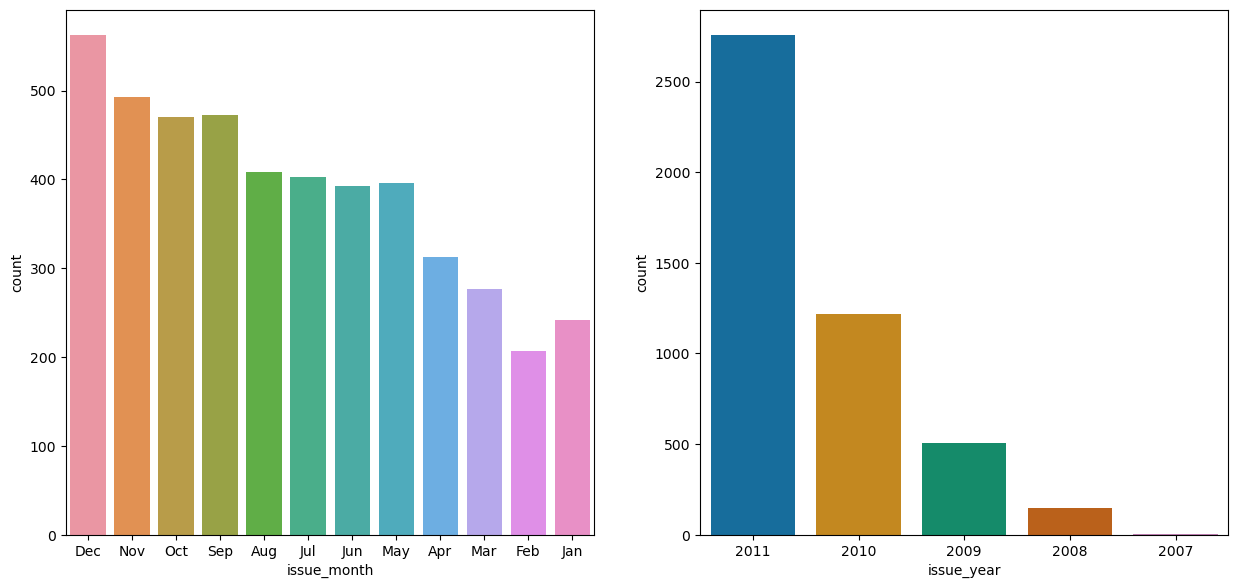

In [154]:
plt.figure(figsize=(15,15))
plt.subplot(221)
Maximum number of defaults occured when the loan was sanctioned/issued in Dec. Loan issued in the year 2011 were also as compared to other years
Analyzing installment,dti, loan_amnt

# Maximum number of defaults you can see when the loan was sanctioned/issued in Dec. Loan issued in the year 2011 were also as compared to other years

Analyzing installment,dti, loan_amnt
In this way you can check when was the time when the people got the loan in which year. 

In [155]:
loan_data['installment_groups'] = pd.cut(loan_data['installment'], bins=10,precision =0,labels=['14-145','145-274','274-403','403-531','531-660','660-789','789-918','918-1047','1047-1176','1176-1305'])
loan_data['funded_amnt_inv_group'] = pd.cut(loan_data['funded_amnt_inv'], bins=7,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k']) ## bin is starting from -35?
loan_data['loan_amnt_groups'] = pd.cut(loan_data['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
loan_data['dti_groups'] = pd.cut(loan_data['dti'], bins=5,precision =0,labels=['0-6','6-12','12-18','18-24','24-30'])


In [ ]:
fig,ax = plt.subplots(figsize = (12,5))
ax.set_yscale('log')
sns.countplot(x='funded_amnt_inv_group', data=loan_data[loan_data['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='loan_amnt_groups', ylabel='count'>

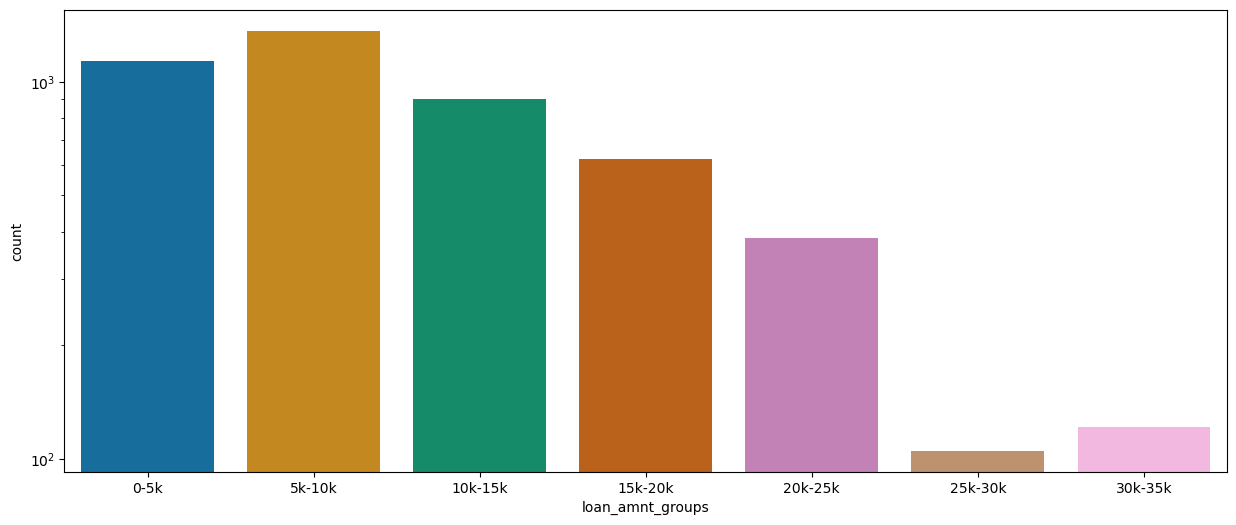

In [157]:

fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('log')
sns.countplot(x='loan_amnt_groups', data=loan_data[loan_data['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='dti_groups', ylabel='count'>

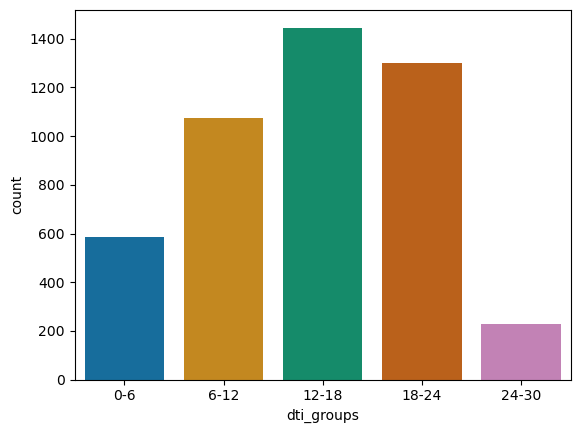

In [158]:
sns.countplot(x='dti_groups', data=loan_data[loan_data['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='installment_groups', ylabel='count'>

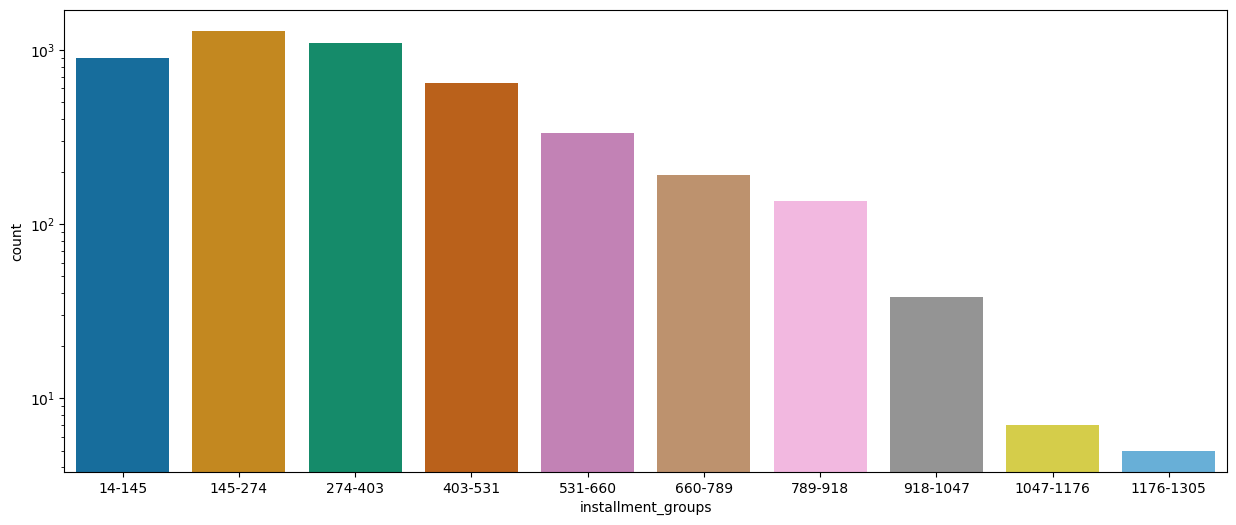

In [159]:
fig,ax = plt.subplots(figsize = (15,6))
ax.set_yscale('log')
sns.countplot(x='installment_groups', data=loan_data[loan_data['loan_status']=='Charged Off'])

<AxesSubplot:xlabel='count', ylabel='term'>

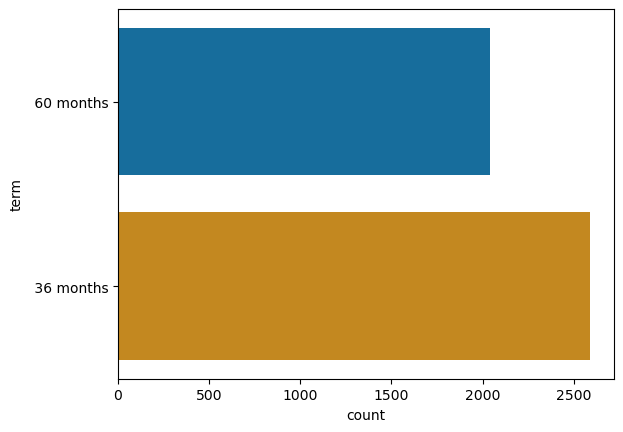

In [160]:

sns.countplot(y='term', data=loan_data[loan_data['loan_status']=='Charged Off'])

In [162]:
#Findings 

In [164]:
#Also there is a very interesting observation from the date issued. The late months of an year indicated the high possibility of defaulting.

In [165]:
#The high number of loan defaults in 2011 could be due to the financial crisis in USA (Assuming the data is of US origin)

# Analysing annual income with other columns for more insights


# 1. Annual income vs loan rationale or purpose

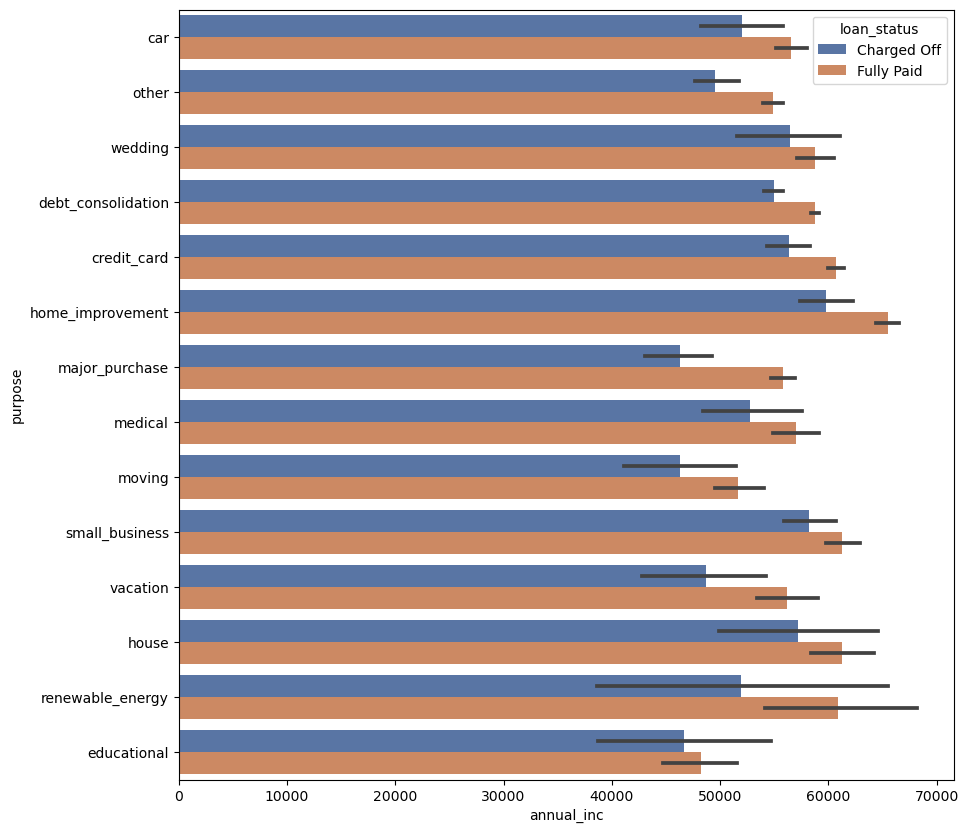

In [168]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='annual_inc', y='purpose', hue ='loan_status',palette="deep")
plt.show()

# we know the number of loans applied and defaulted are the highest in number for "debt_consolation", the annual income of those who applied isn't the highest

# ##Applicants with higher salary mostly applied loans for "home_improvement", "house", "renewable_energy" and "small_businesses"

# 2.Annual income vs home ownership

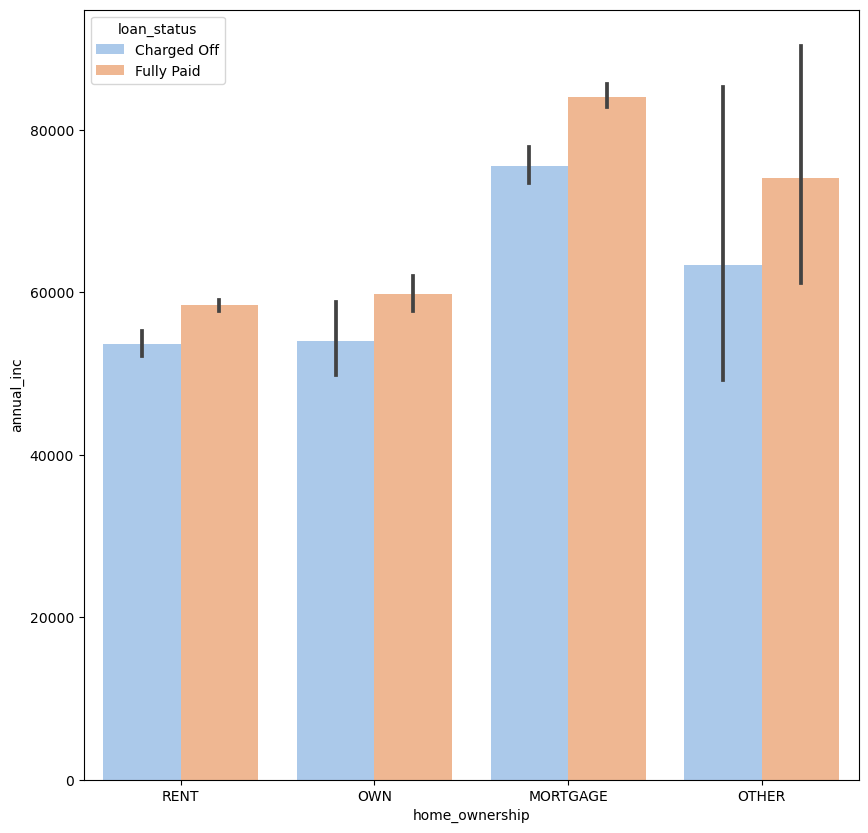

In [209]:
plt.figure(figsize=(10,10))
sns.barplot(data = loan_data, x='home_ownership' , y='annual_inc', hue ='loan_status', palette = "pastel")
plt.show()

ValueError: Could not interpret value `issue_month` for parameter `x`

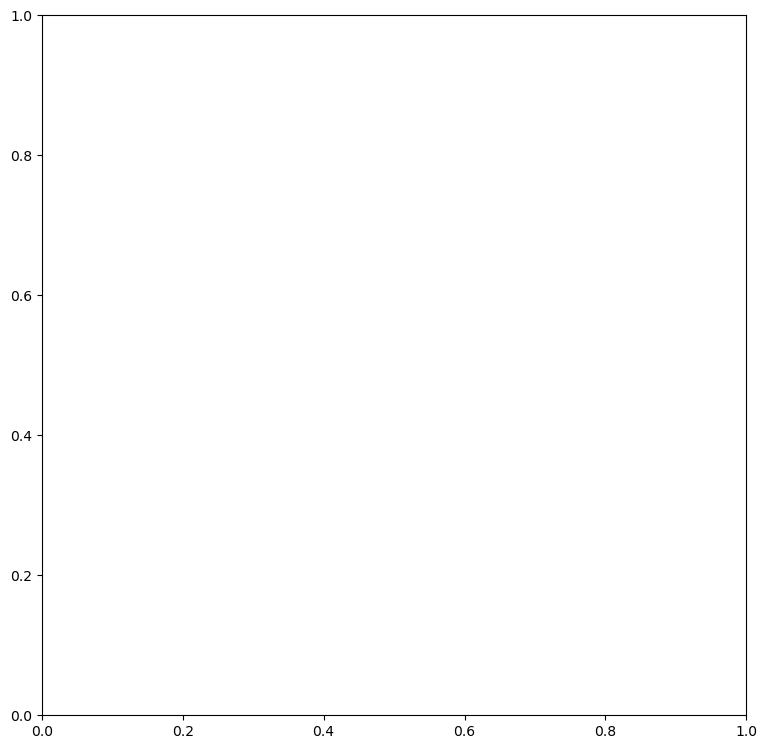

In [226]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.lineplot(data =loan_data,y='loan_amnt', x='issue_month', hue ='loan_status',palette="pastel")
plt.subplot(222)
sns.lineplot(data =loan_data,y='loan_amnt', x='issue_year', hue ='loan_status',palette="pastel")

# 3.Across all the income groups, the loan_amount is higher for people who defaulted.

# 4. Loan amount vs month issued and year issued

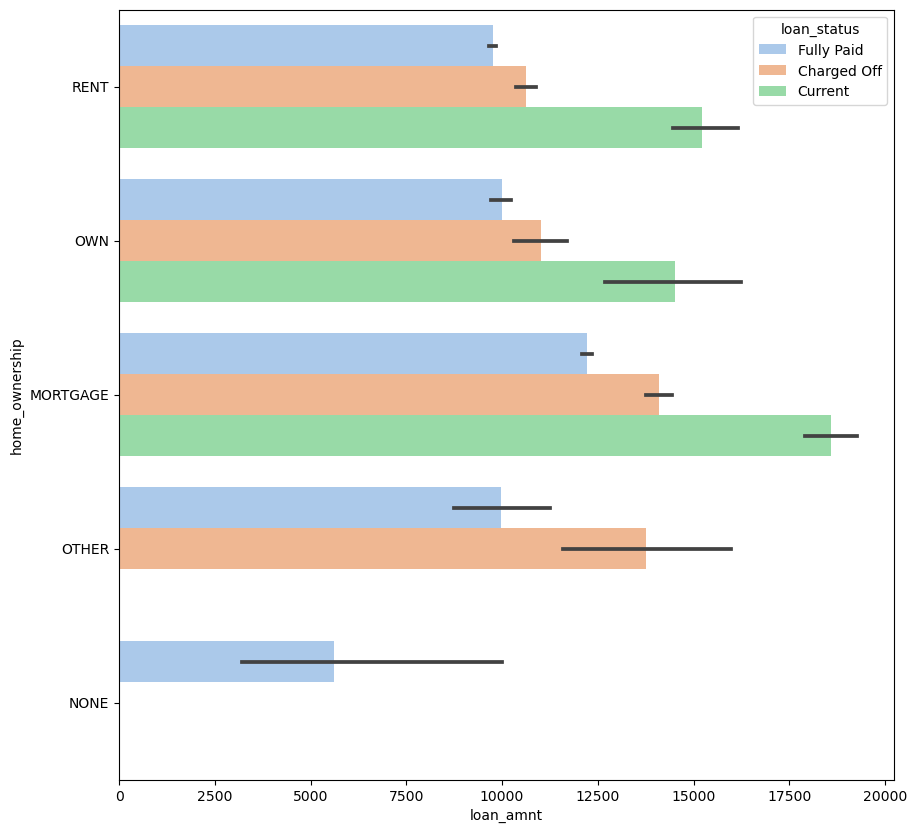

In [221]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='loan_amnt', y='home_ownership', hue ='loan_status',palette="pastel")
plt.show()

# 5.Loan amount vs Grade

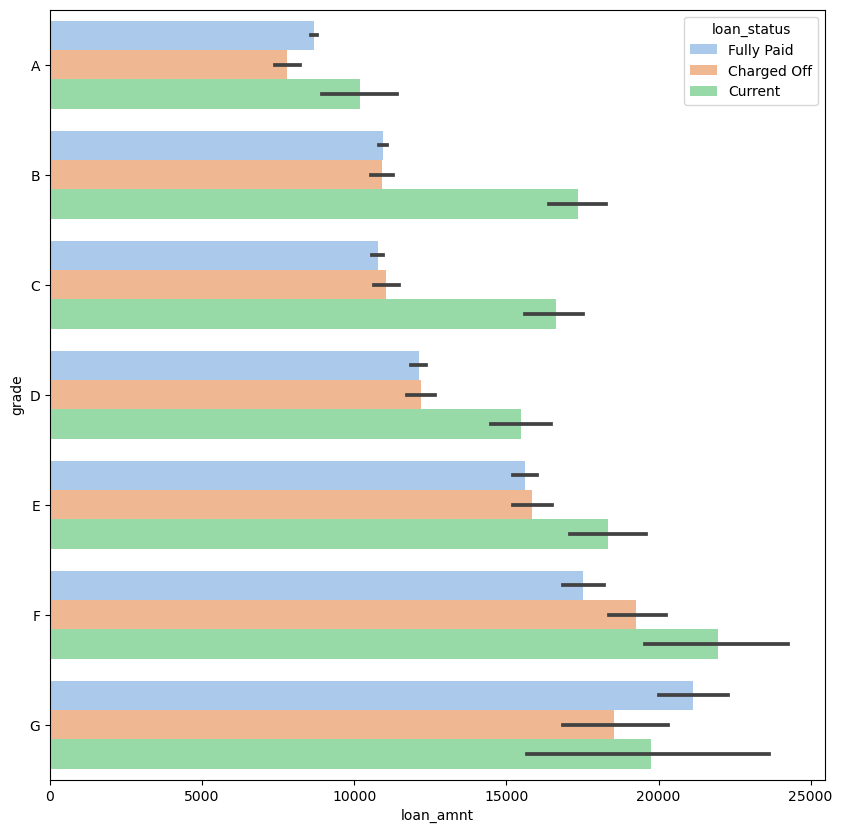

In [222]:
plt.figure(figsize=(10,10))
sns.barplot(data =loan_data,x='loan_amnt', y='grade', hue ='loan_status',palette="pastel", order=['A','B','C','D','E','F','G'])
plt.show()

<AxesSubplot:xlabel='verification_status', ylabel='loan_amnt'>

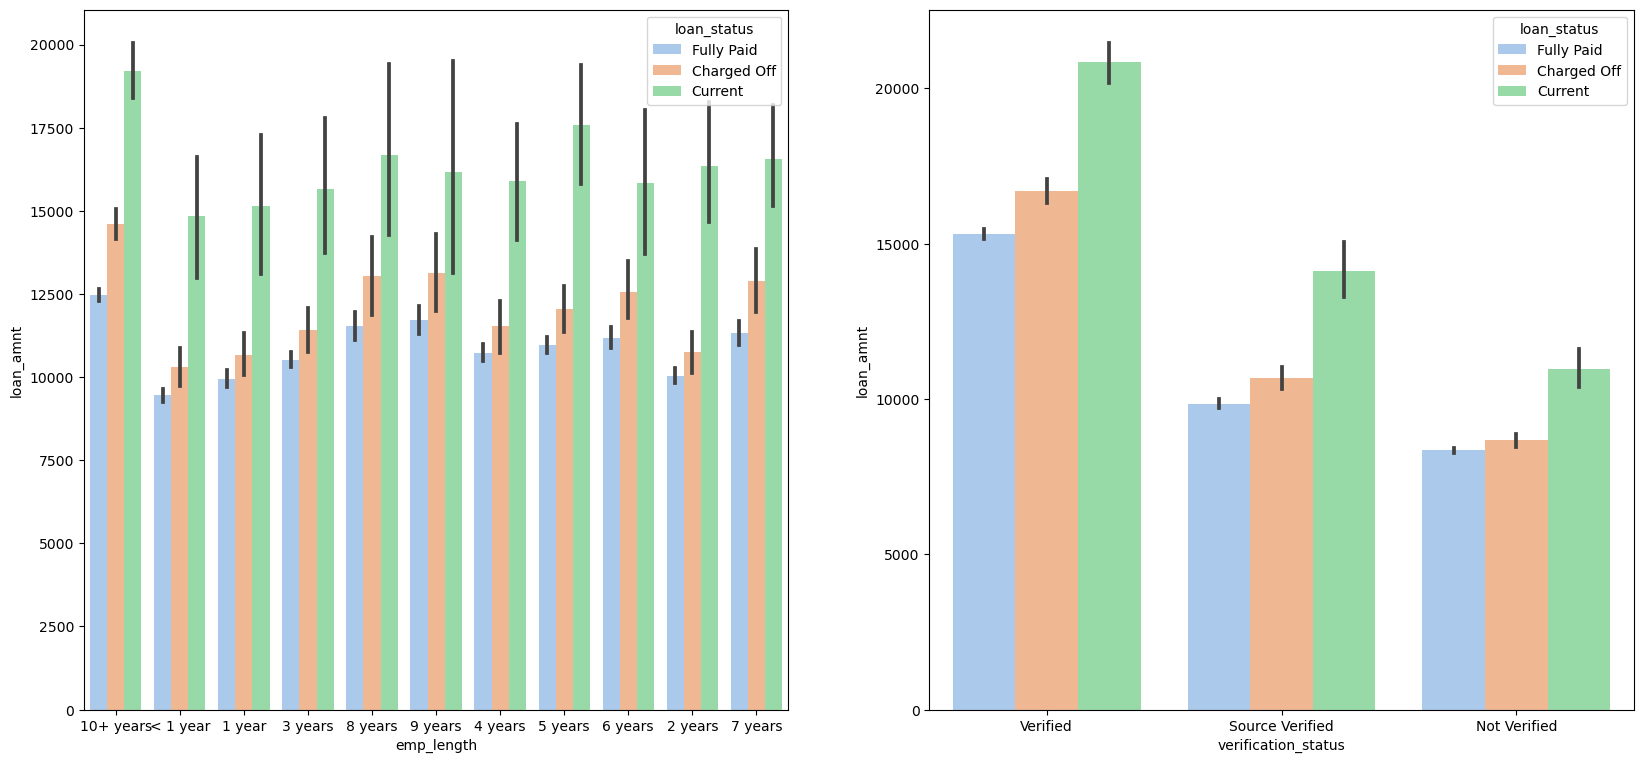

In [223]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.barplot(data =loan_data,y='loan_amnt', x='emp_length', hue ='loan_status',palette="pastel")
plt.subplot(222)
sns.barplot(data =loan_data,y='loan_amnt', x='verification_status', hue ='loan_status',palette="pastel")